In [1]:
# importing libraries for EDA
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# reading the dataset
df = pd.read_csv('Default_Fin.csv')

In [3]:
# viewing the first five rows of the dataset for basic EDA
df.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [4]:
# viewing the basic statistics of the dataset for basic EDA
df.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


In [5]:
# checking for null values
df.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

In [6]:
# checking the data types of the features in the dataset
df.dtypes

Index              int64
Employed           int64
Bank Balance     float64
Annual Salary    float64
Defaulted?         int64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


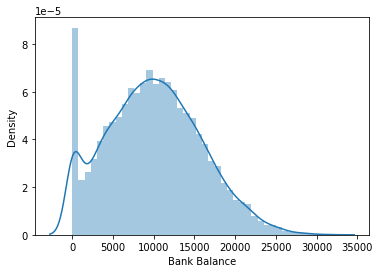

In [7]:
# checking for skewed features in the dataset
sns.distplot(df['Bank Balance'])
# looks good

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


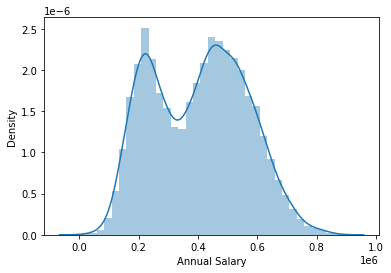

In [8]:
# checking for skewed features in the dataset
sns.distplot(df['Annual Salary'])
# looks good

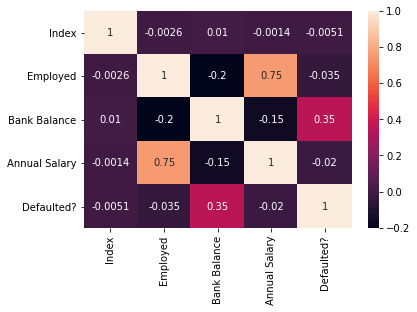

In [9]:
# checking for correlated features in the dataset
corr = df.corr()
sns.heatmap(corr, annot=True)
# looks good

In [10]:
# engineering a new feature to improve the accuracy
df['Expenditure'] = df['Annual Salary'] - df['Bank Balance']

In [11]:
# splitting the depenedent and independent features in the dataset
# also notice dropping of the 'Index' column as a part of feature selection
X = df.drop(columns=['Index','Defaulted?'])
y = df['Defaulted?']

In [12]:
# splitting the dataset for training and testing 
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 42)

In [13]:
# identifying the numerical columns for further preprocessing
numerical_cols = [cname for cname in X_train.columns if X_train[cname].dtype in ['int64', 'float64']]

In [14]:
# building pipeline for data preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

numerical_transformer = Pipeline(steps = [
    ('scaler', RobustScaler()),
    ('imputer', SimpleImputer(strategy='constant')),
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
      ])

In [15]:
# defining the model
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth = 4, learning_rate = 0.01, n_estimators = 1000, random_state = 42)

In [16]:
# bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('xgb', xgb)
                             ])

# preprocessing of training data, fitting the model 
my_pipeline.fit(X_train, y_train)

# preprocessing of validation data, evaluating the model
testscore = my_pipeline.score(X_valid, y_valid)
print('Testing Score: ', testscore*100)

trainscore = my_pipeline.score(X_train, y_train)
print('Training Score: ', trainscore*100)

Testing Score:  97.44
Training Score:  97.73333333333333
